In [ ]:
# Bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import pearsonr

In [ ]:
# Importando arquivos:
from google.colab import files
files.upload()

# Centralidade

In [ ]:
# Leitura dos dados: lesmis *3 colunas, tem peso
G = nx.read_edgelist("/content/lesmis.txt", nodetype=int, data=(('weight',float),))

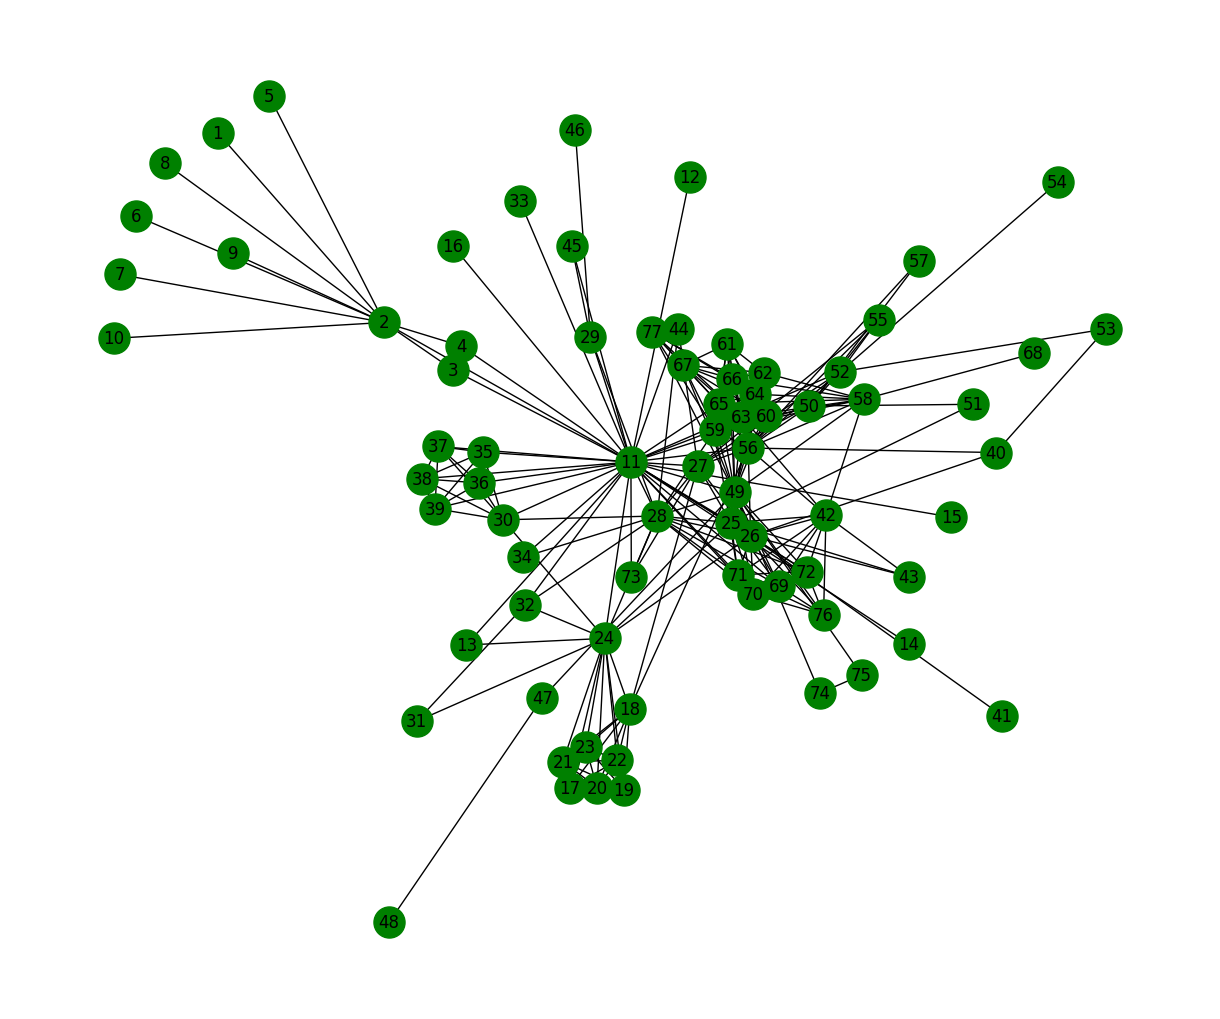

In [ ]:
plt.figure(figsize = (12, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color = "green", node_size = 500, with_labels = True)

### Testando outras formas de ler o arquivo...

In [ ]:
with open("/content/lesmis.txt") as f:
  lesmis = nx.Graph([line.split()[:2] for line in f])

In [ ]:
print("Nodes:", nx.number_of_nodes(lesmis))
print("Edges:", nx.number_of_edges(lesmis))

Nodes: 77
Edges: 254


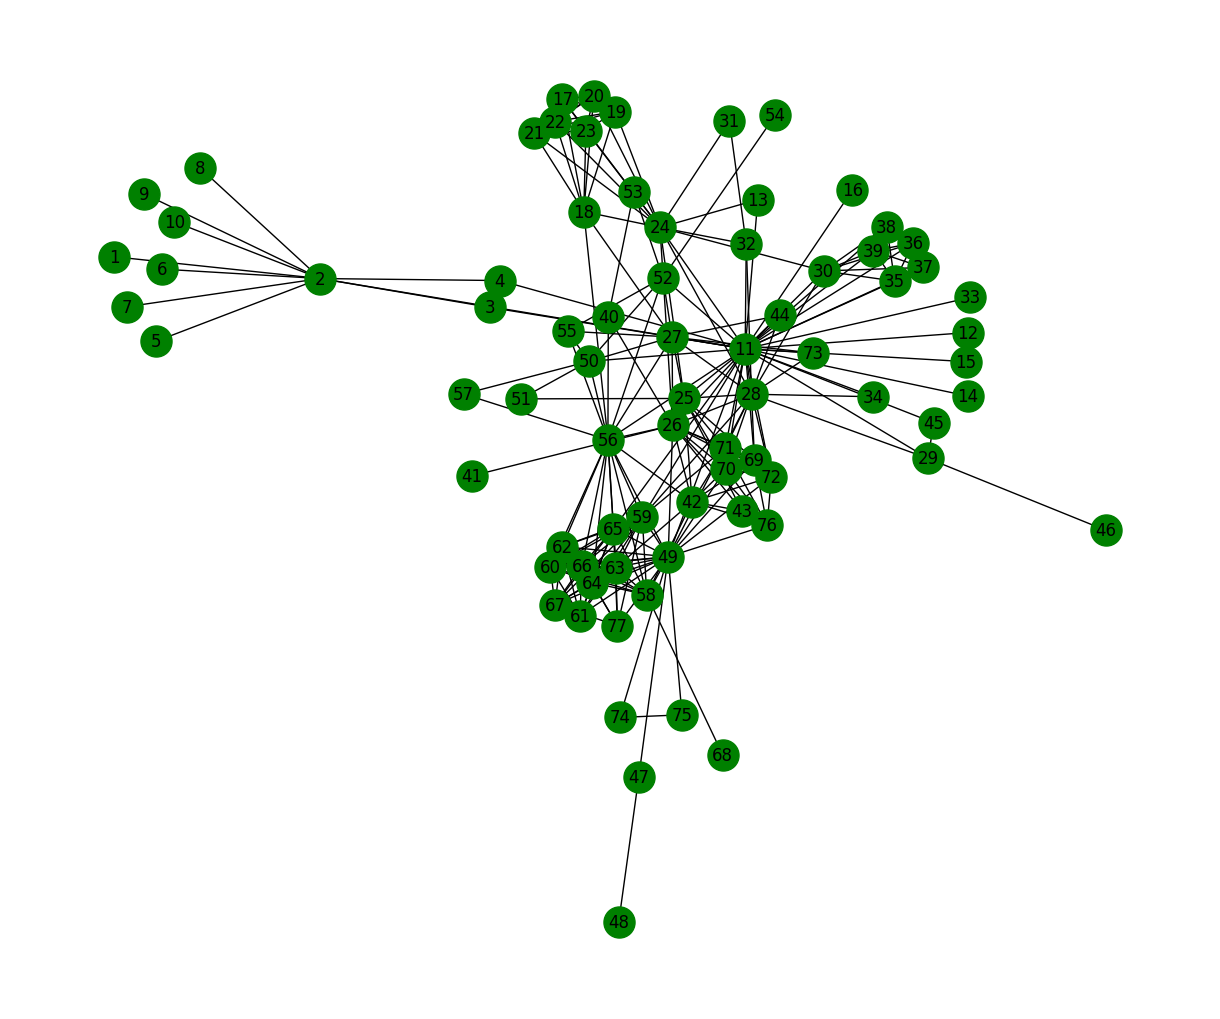

In [ ]:
plt.figure(figsize = (12, 10))
pos = nx.spring_layout(lesmis)
nx.draw(lesmis, pos, node_color = "green", node_size = 500, with_labels = True)

### Retomando...

**Etapas preparação da rede:**

1.   Ler rede
2.   Transformar em não direcionada
3.   Remover auto-loops
4.   Pegar maior componente conectado
5.   Converter labels para inteiros (começando do zero)

In [ ]:
# Preparação da rede:
G.to_undirected() #undirected
G.remove_edges_from(nx.selfloop_edges(G)) #remove selfloops
Gcc = sorted(nx.connected_components(G), key = len, reverse = True) #maior componente conectado
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label = 0)

In [ ]:
print("Nodes:", nx.number_of_nodes(G))
print("Edges:", nx.number_of_edges(G))

Nodes: 77
Edges: 254


## Degree centrality

Basicamente a centralidade seria dada pelo grau do vértice.

In [ ]:
vk = dict(G.degree())
vk = list(vk.values())
print("Degree centrality:", vk)

Degree centrality: [1, 10, 3, 3, 1, 1, 1, 1, 1, 1, 36, 1, 2, 1, 1, 1, 15, 11, 16, 11, 17, 4, 8, 4, 1, 2, 6, 6, 6, 6, 6, 3, 2, 22, 7, 7, 19, 15, 13, 10, 10, 10, 9, 3, 7, 9, 7, 7, 7, 7, 7, 2, 11, 3, 2, 3, 1, 7, 4, 1, 2, 11, 13, 2, 1, 11, 9, 11, 12, 12, 10, 2, 2, 7, 2, 1, 1]


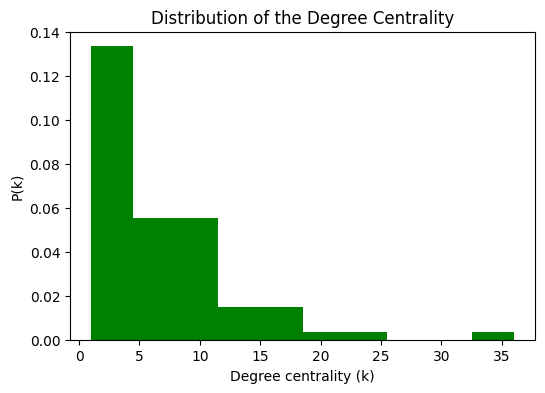

In [ ]:
# Distribuição do centralidade do grau:
plt.figure(figsize = (6, 4))
plt.hist(vk, density = True, color = 'green')
plt.xlabel("Degree centrality (k)")
plt.ylabel("P(k)")
plt.title("Distribution of the Degree Centrality")
plt.show()

## Closeness centrality

Considera a distância média de um vértice a todos os outros.

In [ ]:
clc = dict(nx.closeness_centrality(G))
clc = list(clc.values())
print("Closeness centrality:", clc)

Closeness centrality: [0.30158730158730157, 0.4293785310734463, 0.41304347826086957, 0.41304347826086957, 0.30158730158730157, 0.30158730158730157, 0.30158730158730157, 0.30158730158730157, 0.30158730158730157, 0.30158730158730157, 0.6440677966101694, 0.39378238341968913, 0.41304347826086957, 0.39378238341968913, 0.39378238341968913, 0.39378238341968913, 0.46060606060606063, 0.46060606060606063, 0.5170068027210885, 0.4779874213836478, 0.5170068027210885, 0.4021164021164021, 0.42696629213483145, 0.4175824175824176, 0.39378238341968913, 0.3958333333333333, 0.40425531914893614, 0.40425531914893614, 0.40425531914893614, 0.40425531914893614, 0.40425531914893614, 0.4021164021164021, 0.39790575916230364, 0.5135135135135135, 0.4418604651162791, 0.4418604651162791, 0.5314685314685315, 0.4810126582278481, 0.475, 0.4634146341463415, 0.4634146341463415, 0.4523809523809524, 0.4578313253012048, 0.4021164021164021, 0.34080717488789236, 0.3917525773195876, 0.34080717488789236, 0.34080717488789236, 0.3

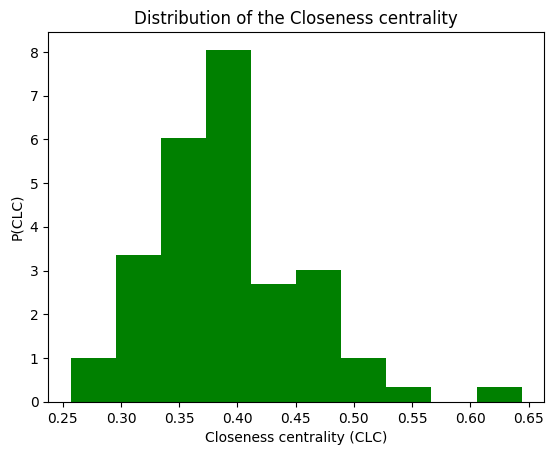

In [ ]:
# Distribution of closeness centrality
plt.hist(clc, density = True, color = "green")
plt.xlabel("Closeness centrality (CLC)")
plt.ylabel("P(CLC)")
plt.title("Distribution of the Closeness centrality")
plt.show()

In [ ]:
av_clc = np.mean(clc)
print("Average closeness centrality:", av_clc)

Average closeness centrality: 0.3893412505666164


## Betweeness centrality

Mede a carga (the load) em cada vértice. 
> Maior "betweeness centrality": mais central é o vértice

In [ ]:
B = dict(nx.betweenness_centrality(G))
B = list(B.values())
print("Betweeness centrality:", B)

Betweeness centrality: [0.0, 0.17684210526315788, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5699890527836186, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12964454098819425, 0.02900241873046176, 0.07490122123424227, 0.023796253454148184, 0.05433155966478437, 0.026491228070175437, 0.008040935672514618, 0.008640295033483887, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1651125024258477, 0.020210621583197756, 0.047598927875243655, 0.132032488621946, 0.0425533568221771, 0.030753650179957816, 0.004960383978389518, 0.004960383978389518, 0.0048618041955992095, 0.0038738298738298736, 0.0, 0.0, 0.04062934817733579, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011487550654163002, 0.0, 0.00021720969089390142, 0.006925438596491229, 0.0, 0.00043859649122807013, 0.0, 0.0, 0.0003508771929824561, 0.027661236424394314, 0.005267029881988332, 0.02631578947368421, 0.0, 0.0012501455659350393, 0.0, 0.0012501455659350393, 0.0021854883087570063, 0.0021854883087570063, 0.00015037593984962405, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


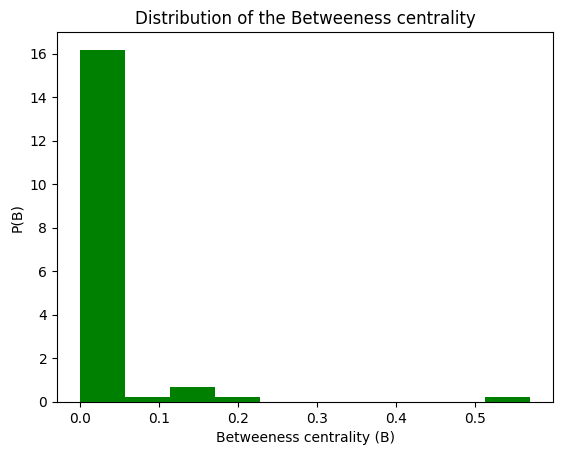

In [ ]:
# Distribuition of Betweeness centrality
plt.hist(B, density = True, color = 'green')
plt.xlabel("Betweeness centrality (B)")
plt.ylabel("P(B)")
plt.title("Distribution of the Betweeness centrality")
plt.show()

In [ ]:
av_B = np.mean(B)
print("Average betweeness centrality:", av_B)

Average betweeness centrality: 0.021881977671451357


## Eigenvalue centrality

Solta-se uma caminhada aleatória, o vértice mais visitado é o mais central. 
Tem por trás a ideia de que para você ser importante, você deve estar conectado com gente importante, que por sua vez não se conecta com qualquer um.

Principal autovetor: fracção de visitas que o vértice recebe em uma caminhada aleatória.

Generaliza o conceito de grau. 

In [ ]:
EC = dict(nx.eigenvector_centrality(G, max_iter = 1000))
EC = list(EC.values())
print("Eigenvalue centrality:", EC)

Eigenvalue centrality: [0.002343455995011618, 0.02813433602675538, 0.026872999836996425, 0.026872999836996425, 0.002343455995011618, 0.002343455995011618, 0.002343455995011618, 0.002343455995011618, 0.002343455995011618, 0.002343455995011618, 0.2676181759885394, 0.02229115287750187, 0.029767714740768853, 0.02229115287750187, 0.02229115287750187, 0.02229115287750187, 0.08975922949834117, 0.12228242172143367, 0.1878077051550095, 0.1110370239813404, 0.18422516321025711, 0.04004860673568996, 0.06227506194694948, 0.046055011005835686, 0.02229115287750187, 0.03763613953656063, 0.041208283029586554, 0.041208283029586554, 0.041208283029586554, 0.041208283029586554, 0.041208283029586554, 0.046884942434314264, 0.0256270072595397, 0.3178389397749768, 0.06539729702430214, 0.06316905144338801, 0.2591111453417876, 0.2671786328235667, 0.24213078637474134, 0.14543155406625, 0.14543155406625, 0.14153627306562794, 0.13602919446668407, 0.046884942434314264, 0.01968573670953794, 0.04814615586401209, 0.019

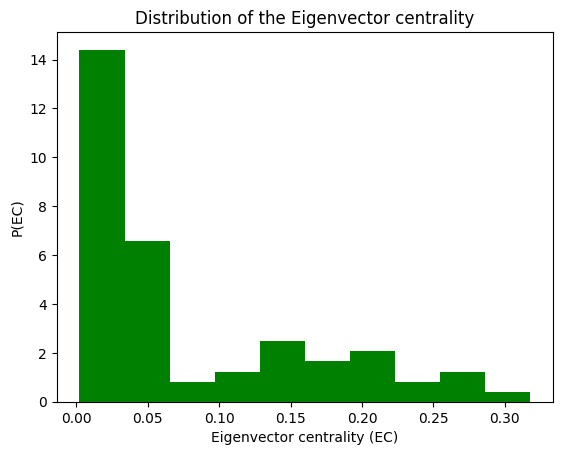

In [ ]:
# Distribution of the Eigenvector centrality
plt.hist(EC, density = True, color = 'green')
plt.xlabel("Eigenvector centrality (EC)")
plt.ylabel("P(EC)")
plt.title("Distribution of the Eigenvector centrality")
plt.show()

In [ ]:
av_EC = np.mean(EC)
print("Average eigenvector centrality:", av_EC)

Average eigenvector centrality: 0.07802991544392941


## Page-rank

Relacionado a caminhadas aleatórias na rede. 

In [ ]:
PR = dict(nx.pagerank(G, alpha = 0.85)) #alpha: ?
PR = list(PR.values())
print("PageRank:", PR)

PageRank: [0.00302445011662527, 0.039250993615993414, 0.0174136025196972, 0.019544335740158427, 0.00302445011662527, 0.00302445011662527, 0.00302445011662527, 0.00302445011662527, 0.004100848285198591, 0.00302445011662527, 0.09957628217876387, 0.0024837793209218223, 0.0034663800480973523, 0.0024837793209218223, 0.0024837793209218223, 0.0024837793209218223, 0.027165616008694403, 0.02004191888203336, 0.0356865855506648, 0.03691400220269323, 0.02682558308731248, 0.012756526634894344, 0.008917199529451565, 0.007282262834973908, 0.0024837793209218223, 0.0035046657753169817, 0.011334725694476957, 0.011334725694476957, 0.009352607660054541, 0.009352607660054541, 0.009352607660054541, 0.004501835654266801, 0.0048074003643200965, 0.028293297311216527, 0.01830585551057957, 0.016681006873251105, 0.0516656523530784, 0.0366019191233266, 0.02618229202167395, 0.01468836648856258, 0.01570141754576917, 0.01197327570487069, 0.00796919221533399, 0.003891823414606999, 0.013160045637317567, 0.0140683746785

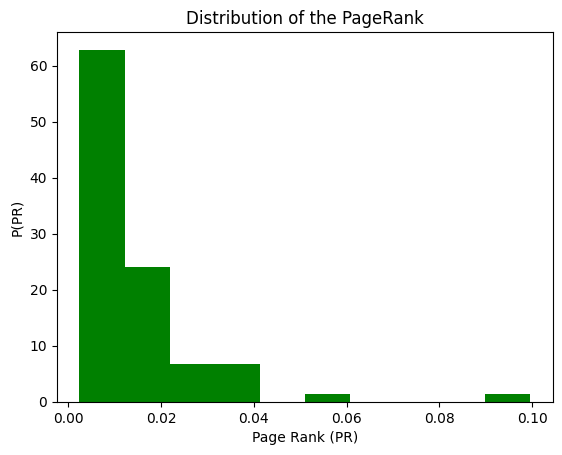

In [ ]:
# Distribution of the Page Rank
plt.hist(PR, density = True, color = 'green')
plt.xlabel("Page Rank (PR)")
plt.ylabel("P(PR)")
plt.title("Distribution of the PageRank")
plt.show()

In [ ]:
av_PR = np.mean(PR)
print("Average PageRank:", av_PR)

Average PageRank: 0.012987012987012988


Text(0, 0.5, 'Betweeness centrality')

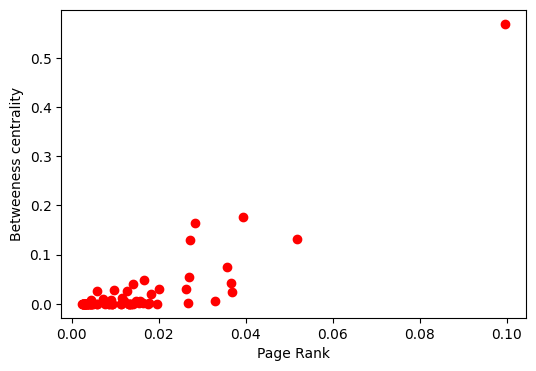

In [ ]:
# Betweeness centrality vs. Page Rank
plt.figure(figsize = (6, 4))
plt.plot(PR, B, 'ro')
plt.xlabel("Page Rank")
plt.ylabel("Betweeness centrality")

## K-core

Medida relacionada a decomposição da rede em subgrafos, de tal modo que o subgrafo resultante apresente grau mínimo igual a k.

O máximo subgrafo conectado no qual todos os vértices tem pelo menos grau k.

Durante o processo de obtenção da medida, os vértices periféricos vão caindo fora, i.e. essa medida permite identificar vértices perifpericos.

Limitação: muitos vértices apresentam valores similares de k-core. Pouca variância.

In [ ]:
KC = dict(nx.core_number(G))
#KC = list(KC.values())
print("k-core:", KC)

k-core: {0: 1, 1: 3, 2: 3, 3: 3, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 8, 11: 1, 12: 2, 13: 1, 14: 1, 15: 1, 16: 7, 17: 7, 18: 8, 19: 6, 20: 8, 21: 2, 22: 6, 23: 3, 24: 1, 25: 2, 26: 6, 27: 6, 28: 6, 29: 6, 30: 6, 31: 3, 32: 2, 33: 9, 34: 4, 35: 4, 36: 9, 37: 9, 38: 9, 39: 8, 40: 8, 41: 8, 42: 8, 43: 3, 44: 7, 45: 7, 46: 7, 47: 7, 48: 7, 49: 7, 50: 7, 51: 2, 52: 8, 53: 3, 54: 2, 55: 2, 56: 1, 57: 7, 58: 4, 59: 1, 60: 2, 61: 9, 62: 9, 63: 1, 64: 1, 65: 9, 66: 9, 67: 9, 68: 9, 69: 9, 70: 9, 71: 2, 72: 2, 73: 7, 74: 2, 75: 1, 76: 1}


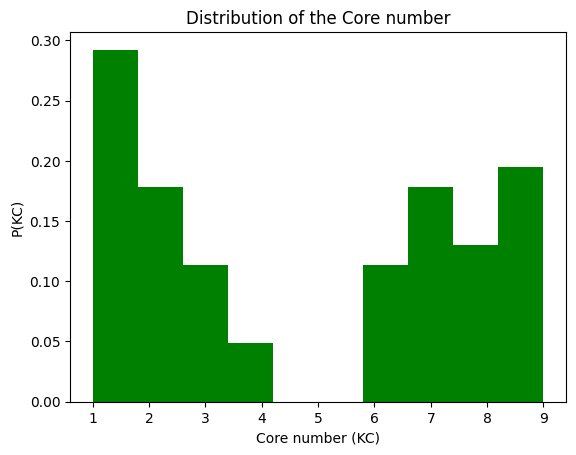

In [ ]:
# Distribuition of the Core number
plt.hist(KC, density = True, color = 'green')
plt.xlabel("Core number (KC)")
plt.ylabel("P(KC)")
plt.title("Distribution of the Core number")
plt.show()

# Random walk accessibility

# Correlação entre medidas de centralidade

Um ponto importante na análise de medidas de centralidade consiste na determinação de sua correlação. Caso duas medidas sejam fortemente correlacionadas, então temos que considerar apenas uma delas para  acaracterização da estrutura da rede.

Vamos lidar com todas as medidas de centralidade calculadas até então.

### Leitura da rede e cálculo das medidas de centralidade

In [ ]:
# Leitura da rede:
G = nx.read_edgelist("/content/lesmis.txt", nodetype=int, data=(('weight',float),))

# Preparação da rede:
G.to_undirected() #undirected
G.remove_edges_from(nx.selfloop_edges(G)) #remove selfloops
Gcc = sorted(nx.connected_components(G), key = len, reverse = True) #maior componente conectado
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label = 0)

# Medidas de centralidade:
vk = dict(G.degree())
vk = list(vk.values())

clc = dict(nx.closeness_centrality(G))
clc = list(clc.values())

B = dict(nx.betweenness_centrality(G))
B = list(B.values())

EC = dict(nx.eigenvector_centrality(G, max_iter = 1000))
EC = list(EC.values())

PR = dict(nx.pagerank(G, alpha = 0.85))
PR = list(PR.values())

KC = dict(nx.core_number(G))
KC = list(KC.values())

### Criação DataFrame com as medidas de centralidade

In [ ]:
import pandas as pd #dataframes; https://pandas.pydata.org/pandas-docs/stable/10min.html

# Criando DataFrame para lidar com os dados
df = pd.DataFrame({'K': vk, 'CLC': clc, 'B': B, 'EC': EC, 'PR': PR, 'KC': KC})
print(df)

     K       CLC         B        EC        PR  KC
0    1  0.301587  0.000000  0.002343  0.003024   1
1   10  0.429379  0.176842  0.028134  0.039251   3
2    3  0.413043  0.000000  0.026873  0.017414   3
3    3  0.413043  0.000000  0.026873  0.019544   3
4    1  0.301587  0.000000  0.002343  0.003024   1
..  ..       ...       ...       ...       ...  ..
72   2  0.342342  0.000000  0.028879  0.005728   2
73   7  0.353488  0.000000  0.140711  0.004509   7
74   2  0.351852  0.000000  0.027029  0.002907   2
75   1  0.307692  0.000000  0.005262  0.002565   1
76   1  0.284644  0.000000  0.016244  0.003496   1

[77 rows x 6 columns]


### Matriz de correlação

In [ ]:
corr = df.corr()

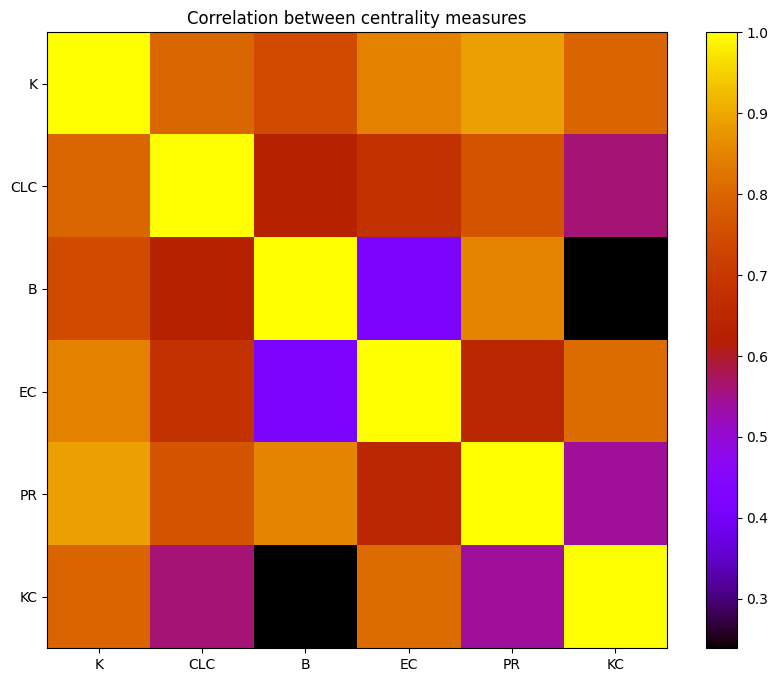

In [ ]:
# Plot Correlation mtarix using Matplotlib
plt.figure(figsize = (10, 8))
plt.imshow(corr, cmap = 'gnuplot', interpolation = 'none', aspect = 'auto')
plt.colorbar() #barra lateral, "legenda"
plt.title("Correlation between centrality measures")
plt.xticks(range(len(corr)), corr.columns) #rotation = 45)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

### Pair plot (Seaborn)

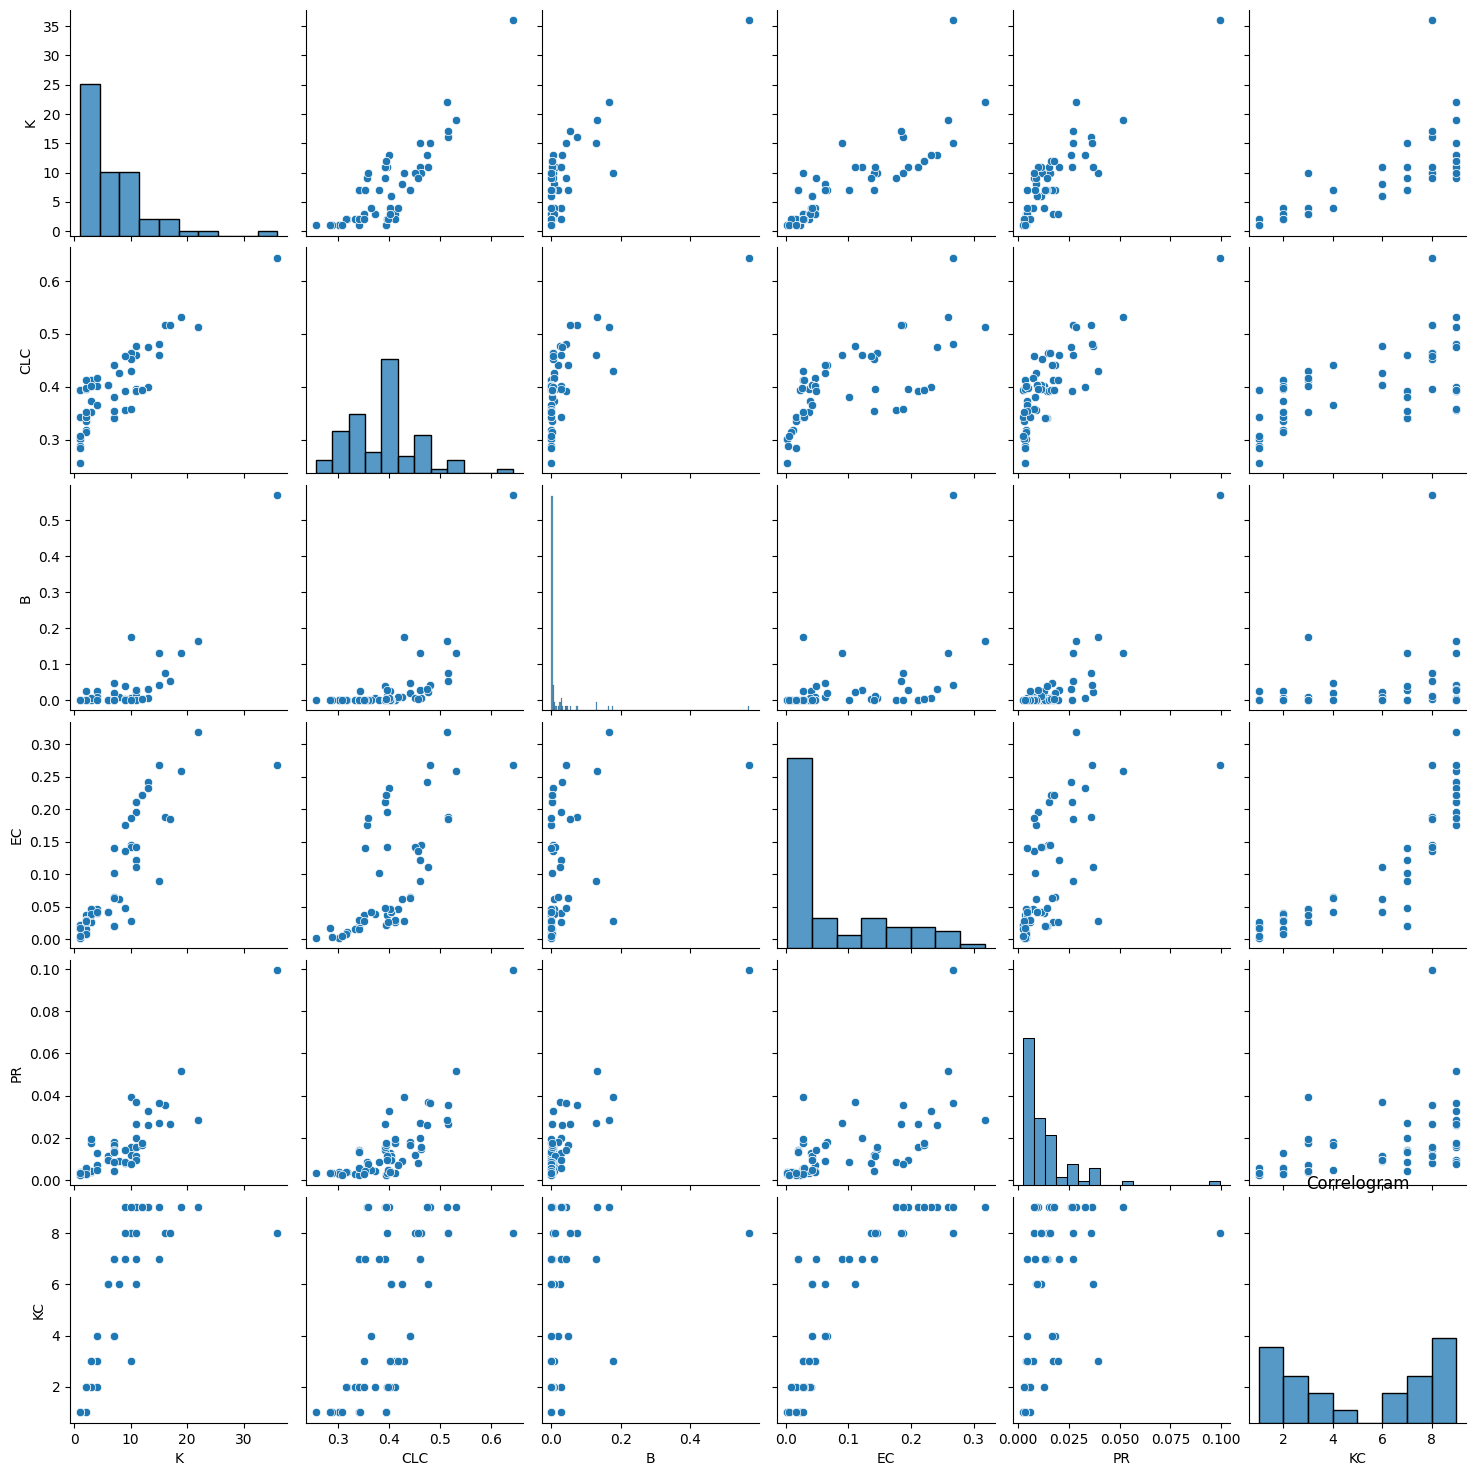

In [ ]:
import seaborn as sns
sns.pairplot(df)
#plt.show()

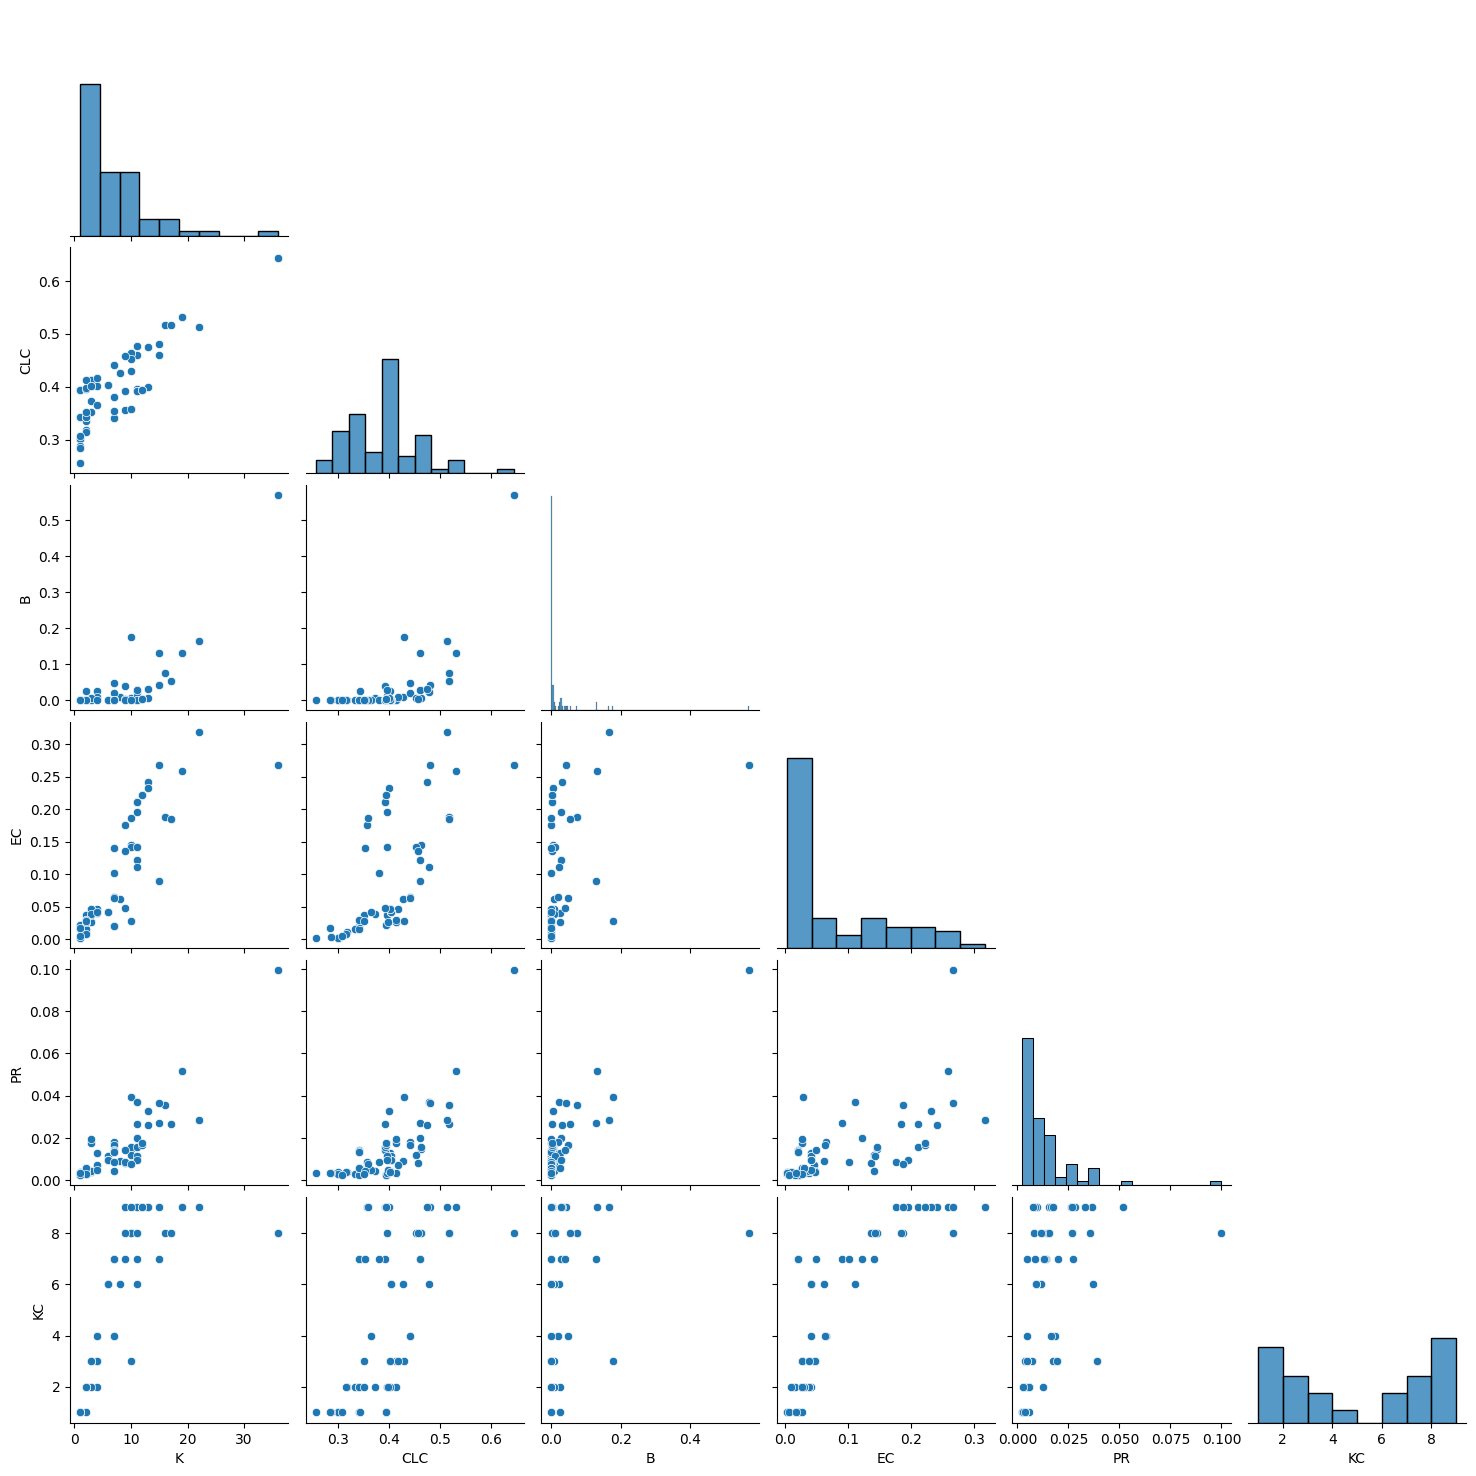

In [ ]:
sns.pairplot(df, corner = True)

Text(0.5, 1.05, 'Correlogram')

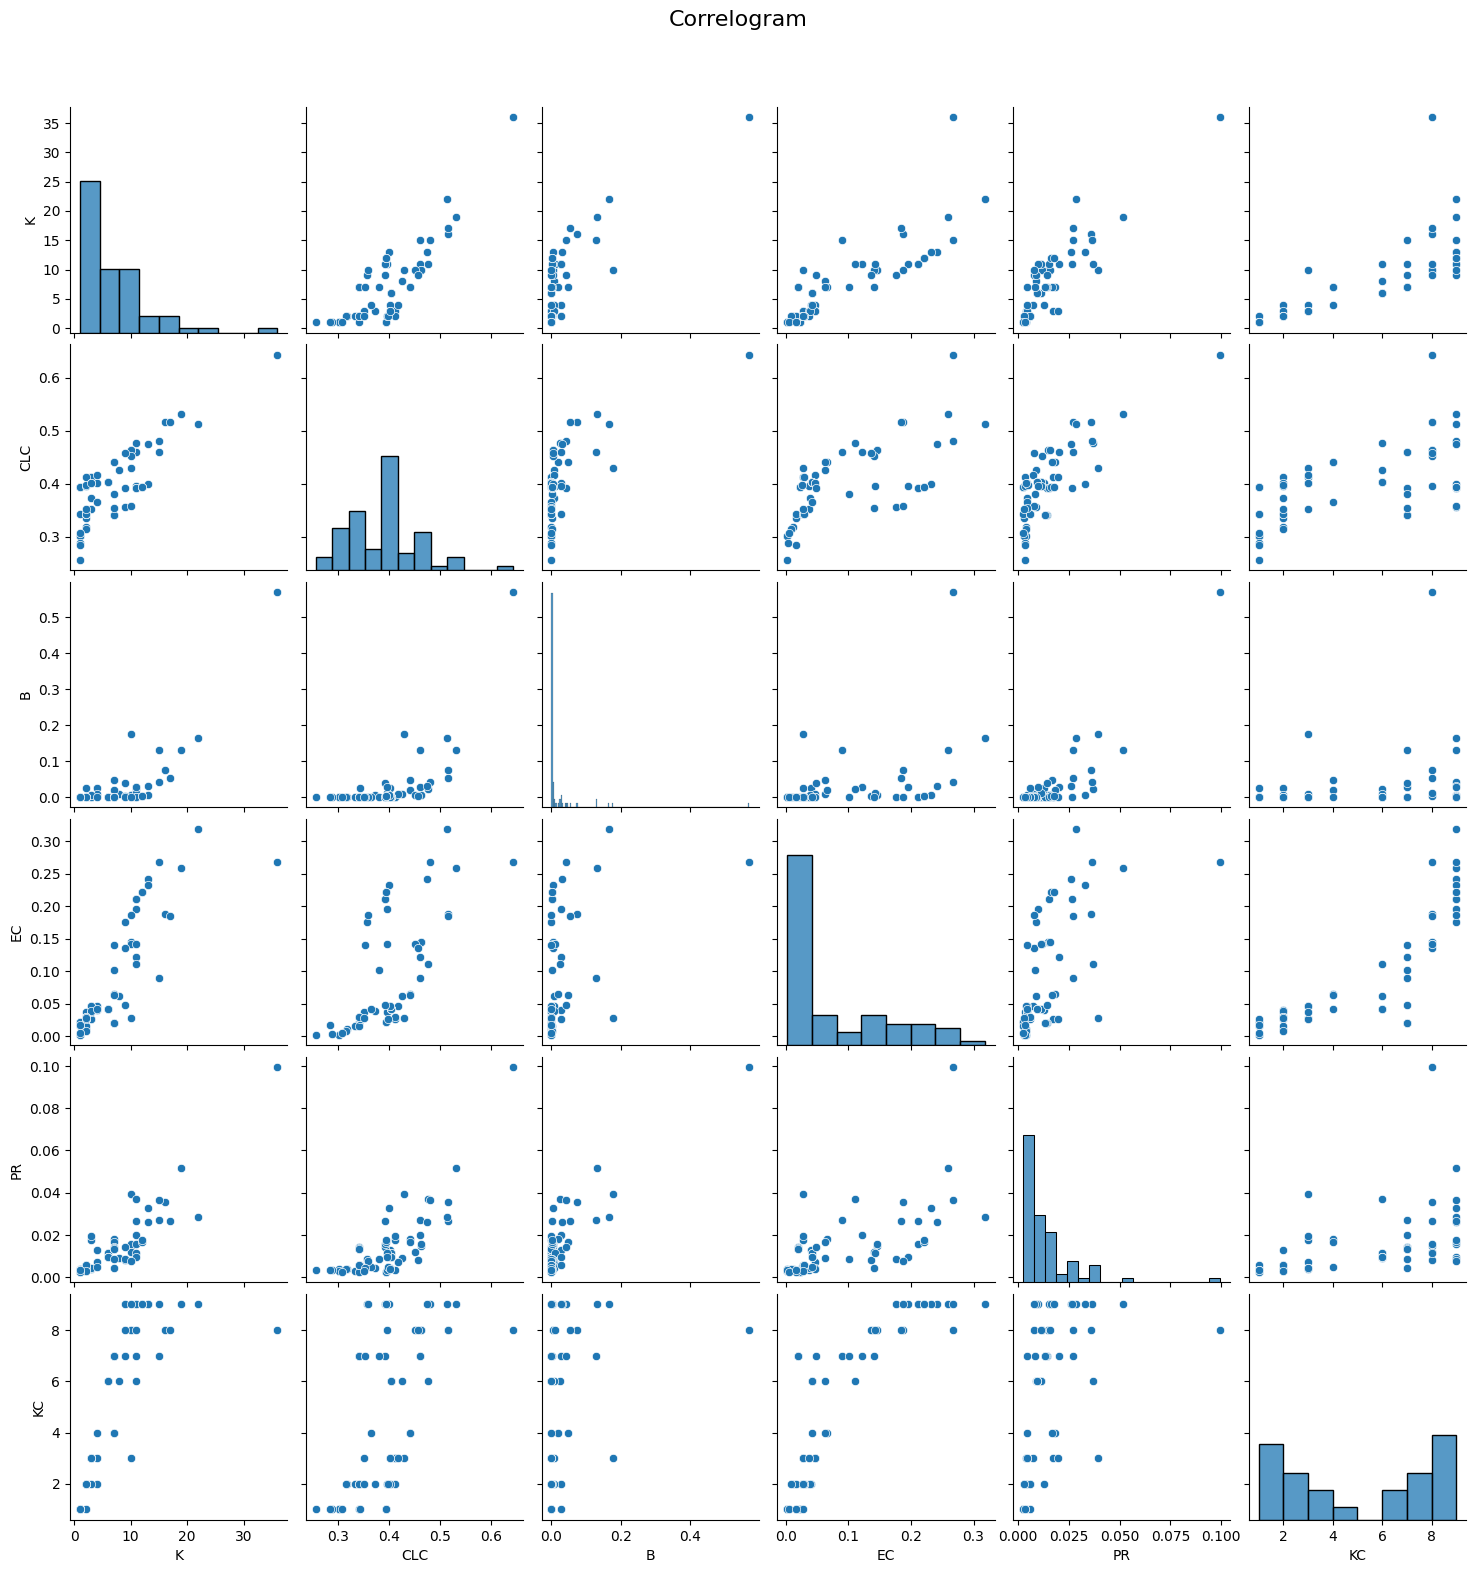

In [ ]:
g = sns.pairplot(df)
g.fig.suptitle("Correlogram", y = 1.05, fontsize = 16)

### Heatmap

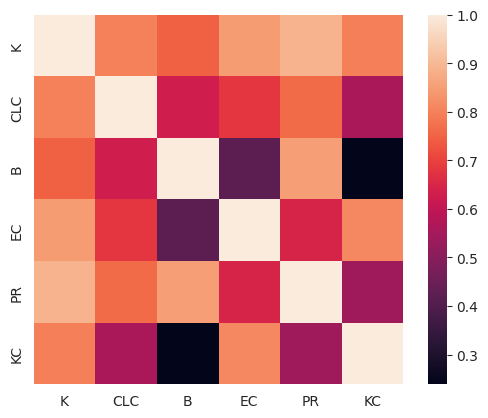

In [ ]:
corr = df.corr()
with sns.axes_style("white"):ax = sns.heatmap(corr, vmax=1, square=True)

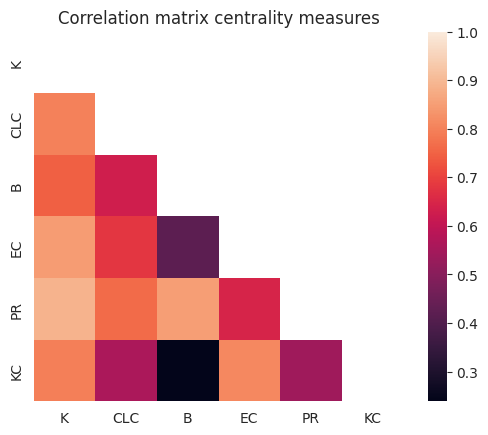

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)
plt.title("Correlation matrix centrality measures")
plt.show()

# Localização

# Comparando medidas de centralidade

Opa: tá faltando o arquivo "test-centrality.txt"

In [ ]:
test = nx.read_edgelist("/content/test.txt")

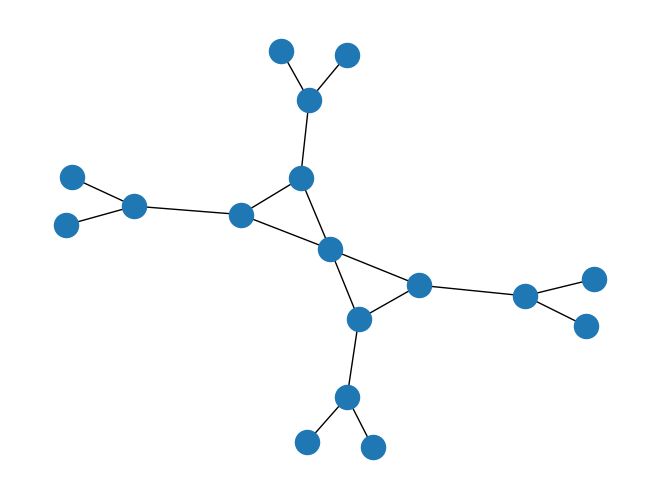

In [ ]:
nx.draw(test)

In [ ]:
# Visualização da rede
plt.figure(figsize=(6,6))
pos=nx.spring_layout(test)
nx.draw(test, with_labels = True, pos = pos, node_size=500, node_color = 'green')
plt.show(True)

In [ ]:
# Medidas de centralidade:
d = dict(G.degree())
CLC = dict(nx.closeness_centrality(G))
B = dict(nx.betweenness_centrality(G))
EC = dict(nx.eigenvector_centrality(G, max_iter = 1000))
PR = dict(nx.pagerank(G, alpha=0.85))
KC= dict(nx.core_number(G))

### Visualização da rede: tamanho do vértice proporcional a medida de centralidade

In [ ]:
plt.figure(figsize=(6,6))
nx.draw(G,node_size=[v * 100 for v in d.values()], with_labels = False, pos = pos)
#nx.draw(G,node_color=[v for v in d.values()], with_labels = False, pos = pos, 
#        cmap=plt.cm.jet, node_size = 500)
plt.show(True)

In [ ]:
plt.figure(figsize=(6,6))
nx.draw(G,node_size=[v * 1000 for v in CLC.values()], with_labels = False, pos = pos)
plt.show(True)

In [ ]:
plt.figure(figsize=(6,6))
nx.draw(G,node_size=[v * 1000 for v in B.values()], with_labels = False, pos = pos)
plt.show(True)

In [ ]:
plt.figure(figsize=(6,6))
nx.draw(G,node_size=[v * 5000 for v in PR.values()], with_labels = False, pos = pos)
plt.show(True)

In [ ]:
plt.figure(figsize=(6,6))
nx.draw(G,node_size=[v * 200 for v in KC.values()], with_labels = False, pos = pos)
plt.show(True)

# Extras - Color Maps Matplotlib

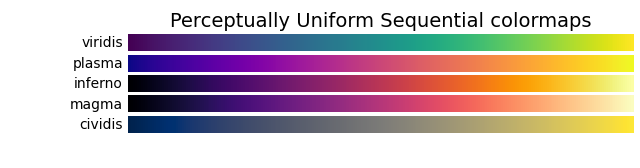

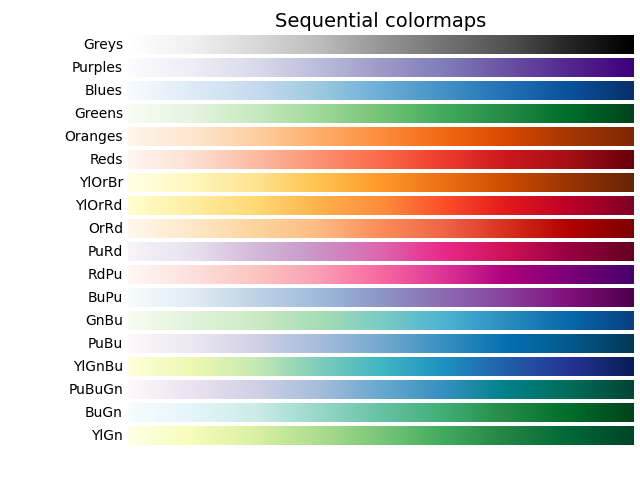

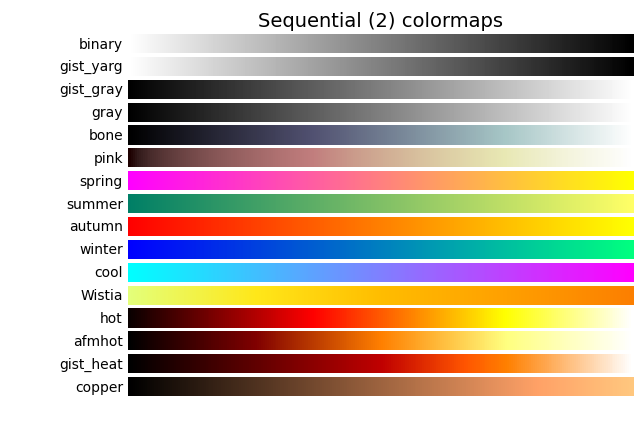

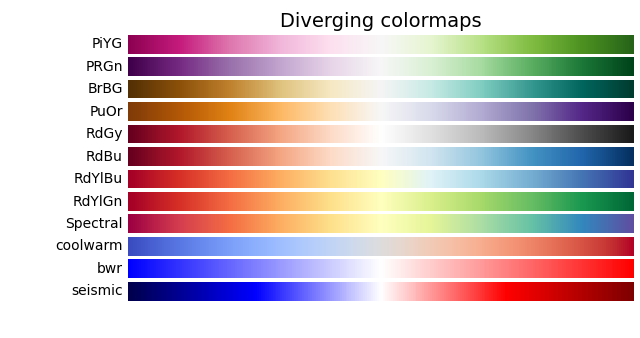

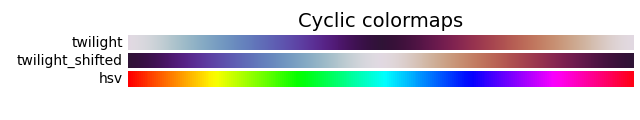

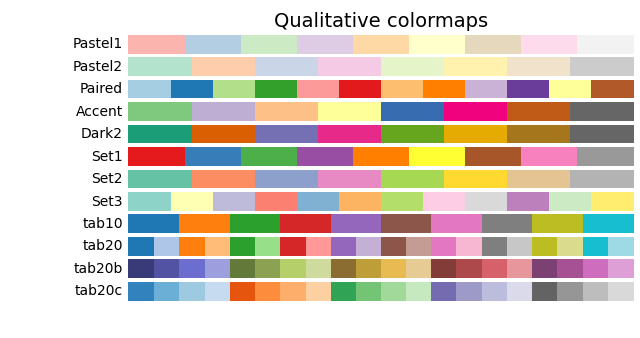

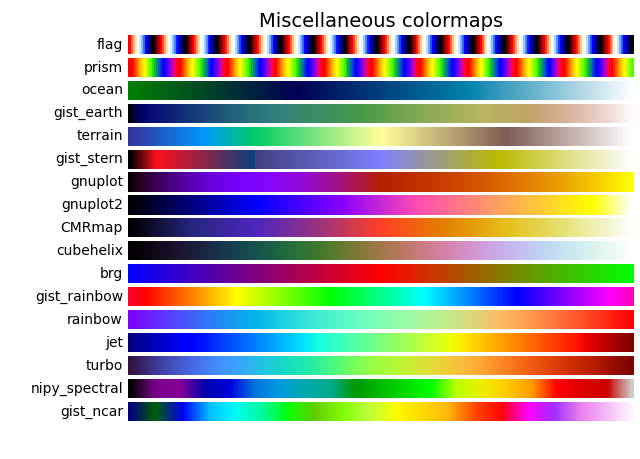

# Perguntas questionário (Q3)

## 1) A média medida eigenvector centrality da rede USairport500 é igual a quanto? Considere apenas o maior componente. 

In [ ]:
# 1) Leitura da rede:
us = nx.read_edgelist("/content/USairport500.txt")

In [ ]:
print("Nodes:", nx.number_of_nodes(us))
print("Edges:", nx.number_of_edges(us))

Nodes: 500
Edges: 2980


In [ ]:
# Use:
us = us.to_undirected()
us.remove_edges_from(nx.selfloop_edges(us))
us_cc = sorted(nx.connected_components(us), key = len, reverse = True)
us = us.subgraph(us_cc[0])
us = nx.convert_node_labels_to_integers(us, first_label = 0)

In [ ]:
print("Nodes:", nx.number_of_nodes(us))
print("Edges:", nx.number_of_edges(us))

Nodes: 500
Edges: 2980


In [ ]:
# Eigenvector centrality
EC = dict(nx.eigenvector_centrality(us))
EC = list(EC.values())
av_EC = np.mean(EC)
print('Average Eigenvector centrality:', av_EC)

Average Eigenvector centrality: 0.022754398239423667


## 2) Calcule a correlação de Pearson entre a medida betweeness centrality e grau para a rede hamsterster. 

In [ ]:
# Leitura da rede:
H = nx.read_edgelist("/content/hamsterster.txt")

In [ ]:
print("Nodes:", nx.number_of_nodes(H))
print("Edges:", nx.number_of_edges(H))

Nodes: 1858
Edges: 12534


In [ ]:
# Use:
H = H.to_undirected() # Undirected
H.remove_edges_from(nx.selfloop_edges(H)) # Remove selfloops
Hcc = sorted(nx.connected_components(H), key = len, reverse = True) # Maior componente conectado
H = H.subgraph(Hcc[0]) 
H = nx.convert_node_labels_to_integers(H, first_label = 0) # (Re)Labels

In [ ]:
print("Nodes:", nx.number_of_nodes(H))
print("Edges:", nx.number_of_edges(H))

Nodes: 1788
Edges: 12476


In [ ]:
# Correlação de Pearson: betweenness centrality & grau
B = dict(nx.betweenness_centrality(H))
B = list(B.values())
print("Betweenness centrality:", B)

Betweenness centrality: [0.0032301395159124173, 0.004359163634432046, 4.69760984669588e-06, 0.0019246756055983022, 0.0015897108730727908, 0.008317832920302798, 0.00042458389219936216, 1.9738944899129653e-05, 0.023830285305123603, 0.011152942491924013, 0.004368348881463037, 0.0034727280151145012, 0.005163274835100675, 0.00411887790194941, 0.02975972399325523, 0.05758339013331758, 0.0002996185250389925, 0.0009208796235972814, 0.01340604707192026, 0.0, 0.004584667123603669, 0.005518916467675661, 0.00024335317825260338, 7.846059838832014e-06, 0.009177311193294593, 0.0015066002983463687, 0.0015066002983463687, 0.0035460458888329164, 0.008128163481218163, 0.01456782086301145, 0.01794811494908073, 0.03539561691905463, 0.0018450219333241019, 0.006158468825870166, 0.0010998920747460827, 0.01315125260071138, 0.010443397043085126, 0.0061497432766047895, 0.0052007215141549315, 0.019465641866217506, 0.003469309000830436, 0.00012548841738266715, 0.0028050061976056012, 0.00033341798034254154, 0.00350

In [ ]:
vk = dict(H.degree())
vk = list(vk.values())
print("Degree centrality (grau):", vk)

Degree centrality (grau): [27, 45, 3, 17, 12, 36, 11, 4, 97, 68, 32, 30, 32, 30, 74, 147, 10, 16, 83, 1, 15, 29, 6, 2, 101, 31, 31, 34, 119, 137, 142, 169, 34, 48, 8, 55, 50, 31, 27, 98, 42, 8, 21, 12, 32, 60, 11, 15, 27, 21, 84, 98, 74, 9, 25, 14, 119, 108, 124, 126, 51, 5, 62, 19, 12, 12, 14, 12, 16, 16, 43, 11, 38, 37, 41, 46, 67, 72, 77, 71, 72, 90, 35, 86, 113, 72, 62, 90, 59, 87, 222, 272, 79, 154, 64, 33, 34, 41, 41, 45, 105, 52, 9, 9, 11, 53, 68, 36, 56, 90, 27, 8, 39, 11, 43, 5, 11, 20, 76, 16, 12, 12, 29, 36, 43, 22, 73, 49, 48, 51, 51, 22, 148, 72, 74, 31, 48, 9, 10, 16, 19, 4, 4, 66, 30, 33, 4, 98, 82, 78, 10, 16, 14, 23, 3, 13, 11, 24, 30, 97, 35, 98, 2, 12, 5, 25, 4, 10, 61, 2, 3, 62, 62, 1, 7, 10, 10, 10, 10, 10, 10, 17, 10, 10, 6, 12, 2, 4, 2, 1, 46, 23, 2, 31, 12, 8, 47, 12, 5, 8, 7, 89, 14, 69, 62, 69, 5, 1, 3, 2, 3, 25, 3, 1, 2, 8, 2, 9, 22, 2, 27, 3, 24, 25, 14, 77, 17, 13, 28, 22, 85, 18, 12, 23, 9, 12, 15, 31, 50, 59, 4, 4, 4, 23, 37, 21, 88, 43, 3, 23, 84, 24, 39

In [ ]:
corr, _ = pearsonr(B, vk) 
print("Pearson correlation:", "%3.4f"%corr)

Pearson correlation: 0.8242


## 3) Calcule o coeficiente de correlação de Spearman entre as medidas closeness centrality e k-core para a rede "Jazz"

In [ ]:
jazz = nx.read_edgelist("/content/jazz.txt")

In [ ]:
print("Nodes:", nx.number_of_nodes(jazz))
print("Edges:", nx.number_of_edges(jazz))

Nodes: 198
Edges: 2742


In [ ]:
jazz = jazz.to_undirected() # undirected
jazz.remove_edges_from(nx.selfloop_edges(jazz)) # remove selfloop
# maior componente conectado
jazz_cc = sorted(nx.connected_components(jazz), key = len, reverse = True)
jazz = jazz.subgraph(jazz_cc[0])
# relabel
jazz = nx.convert_node_labels_to_integers(jazz, first_label = 0)

In [ ]:
print("Nodes:", nx.number_of_nodes(jazz))
print("Edges:", nx.number_of_edges(jazz))

Nodes: 198
Edges: 2742


In [ ]:
# Correlação de Spearman: closeness centrality & k-core
clc = dict(nx.closeness_centrality(jazz))
clc = list(clc.values())
print("Closeness centrality:", clc)

kc = dict(nx.core_number(jazz))
kc = list(kc.values())
print("k-core:", kc)

Closeness centrality: [0.42919389978213507, 0.4613583138173302, 0.48402948402948404, 0.4613583138173302, 0.44269662921348313, 0.4310722100656455, 0.5898203592814372, 0.42919389978213507, 0.48284313725490197, 0.49873417721518987, 0.5038363171355499, 0.5116883116883116, 0.5367847411444142, 0.5157068062827225, 0.5157068062827225, 0.4457013574660634, 0.4129979035639413, 0.5324324324324324, 0.5253333333333333, 0.5549295774647888, 0.4613583138173302, 0.4121338912133891, 0.5811209439528023, 0.5077319587628866, 0.3588342440801457, 0.4746987951807229, 0.5225464190981433, 0.5184210526315789, 0.3724007561436673, 0.37595419847328243, 0.5225464190981433, 0.5116883116883116, 0.49747474747474746, 0.3971774193548387, 0.5090439276485789, 0.4164904862579281, 0.4497716894977169, 0.4613583138173302, 0.40286298568507156, 0.38703339882121807, 0.4528735632183908, 0.49373433583959897, 0.4053497942386831, 0.40702479338842973, 0.4078674948240166, 0.43973214285714285, 0.47815533980582525, 0.4876237623762376, 0.3

In [ ]:
from scipy.stats import spearmanr

In [ ]:
corr_spearman = spearmanr(clc, kc)
print(corr_spearman)

corr_spearman, _ = spearmanr(clc, kc)
print(corr_spearman)

SignificanceResult(statistic=0.7353399833516918, pvalue=5.889403279320568e-35)
0.7353399833516918
